In [159]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# 1. EDA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


<Axes: >

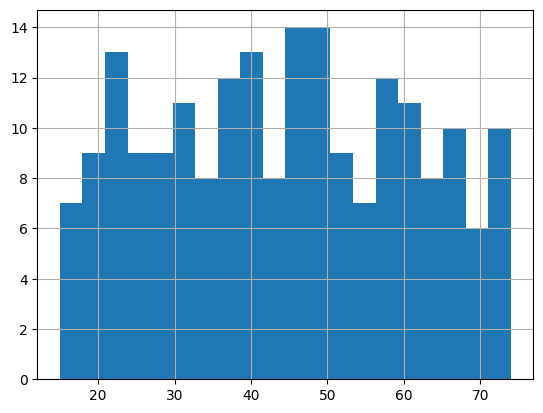

In [160]:
# EDA
drug = pd.read_csv('drug200.csv')
# drug.head()
drug.info() # no missing values
drug['Age'].hist(bins=20)

In [161]:
drug.skew(numeric_only = True)

Age        0.030308
Na_to_K    1.039341
dtype: float64

<Axes: xlabel='BP', ylabel='Cholesterol'>

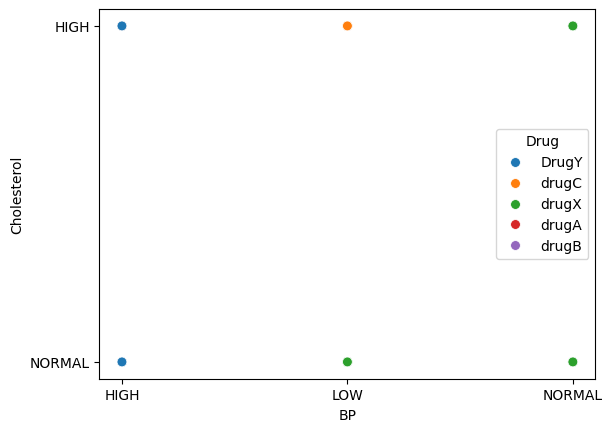

In [162]:
# print(drug['BP'].unique())
# print(drug['BP'].value_counts())
sns.scatterplot(x=drug['BP'], y=drug['Cholesterol'], hue=drug['Drug'], s=50)

In [163]:
# print(drug['BP'].unique())
print(drug['Drug'].value_counts())

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


# 2. Data Preparation

In [164]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [165]:
X = drug[['Age', 'Na_to_K']]
y = drug['Drug']

# 3. Modelling

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [167]:
dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt1.fit(X_train, y_train)
y_pred = dt1.predict(X_test)

In [168]:
result_df = X_test.copy()
result_df = pd.concat([result_df, pd.DataFrame(y_pred, columns = ['Drug Class'])], axis = 1, join = 'inner')
result_df.head()

,Age,Na_to_K,Drug Class
31,74,9.567,DrugY
26,31,30.366,DrugY
14,50,12.703,drugX
19,32,25.974,drugB
34,53,14.133,drugB


# 4. Visualization

In [169]:
from sklearn import tree

In [170]:
test_representation = tree.export_text(dt1, feature_names = X_train.columns)
dt1.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [171]:
test_representation = tree.export_text(dt1, feature_names = X_train.columns)
dt1.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

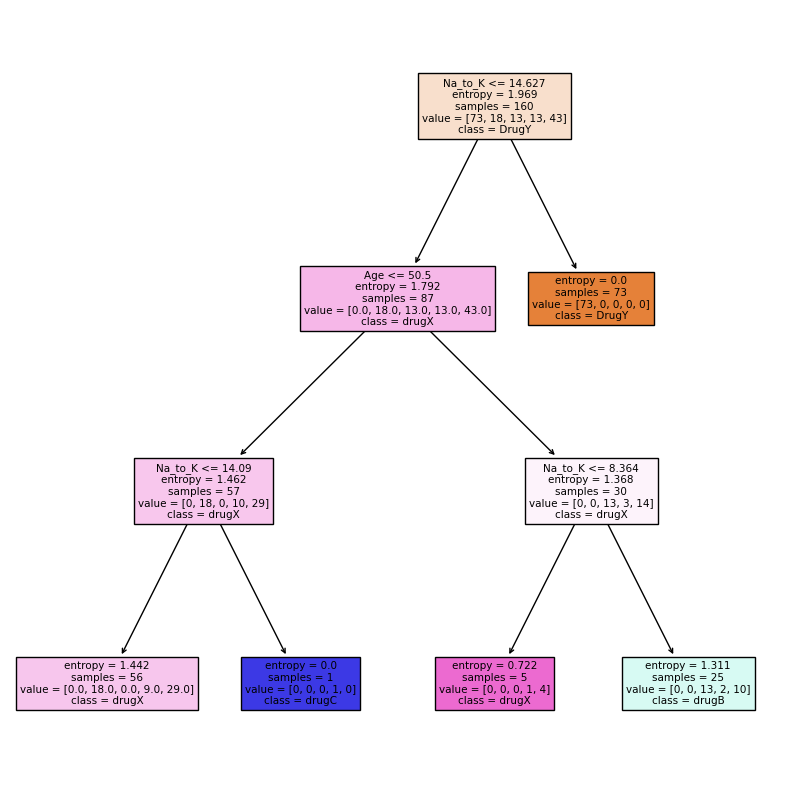

In [172]:
feature_cols = dt1.feature_names_in_
fig = plt.figure(figsize=(10, 10))
dt1_tree = tree.plot_tree(dt1, feature_names = feature_cols, class_names = dt1.classes_, filled = True)

# 5. Evaluation

In [173]:
accuracy = accuracy_score(y_test, y_pred) # Accuracy
round(accuracy,2)

0.68

In [174]:
from sklearn.metrics import confusion_matrix

In [175]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels = ['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'])
print(cnf_matrix)

[[18  0  0  0  0]
 [ 0  0  0  0  5]
 [ 0  0  3  0  0]
 [ 0  0  1  0  2]
 [ 1  0  4  0  6]]


In [176]:
confusion_test_df = pd.DataFrame(cnf_matrix, columns = ['DrugY_pred', 'drugA_pred', 'drugB_pred', 'drugC_pred', 'drugX_pred']\
                      , index =  ['DrugY_act', 'drugA_act', 'drugB_act', 'drugC_act', 'drugX_act'])
confusion_test_df

,DrugY_pred,drugA_pred,drugB_pred,drugC_pred,drugX_pred
DrugY_act,18,0,0,0,0
drugA_act,0,0,0,0,5
drugB_act,0,0,3,0,0
drugC_act,0,0,1,0,2
drugX_act,1,0,4,0,6


In [177]:
from sklearn.metrics import classification_report # Precision, Recall, F1-score

In [178]:
class_labels = drug['Drug'].unique()
print(classification_report(y_test, y_pred, target_names=class_labels))

              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugC       0.00      0.00      0.00         5
       drugX       0.38      1.00      0.55         3
       drugA       0.00      0.00      0.00         3
       drugB       0.46      0.55      0.50        11

    accuracy                           0.68        40
   macro avg       0.36      0.51      0.40        40
weighted avg       0.58      0.68      0.62        40



C:\Users\User\anaconda3\envs\py312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\py312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\anaconda3\envs\py312\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

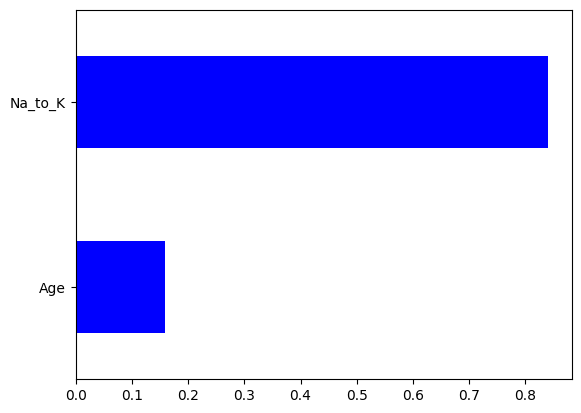

In [179]:
vi = dt1.feature_importances_
# Create a pandas series(single columns data structure) with features importances for plotting.
# This makes it easy to visulaise when we have many features in the data

feat_importances = pd.Series(vi, index = feature_cols)

# Sort
sorted_feat_importances = feat_importances.sort_values()

# Make a horizontal bar plot
sorted_feat_importances.plot(kind='barh', color='blue')